In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import warnings
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
warnings.filterwarnings('ignore')

,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


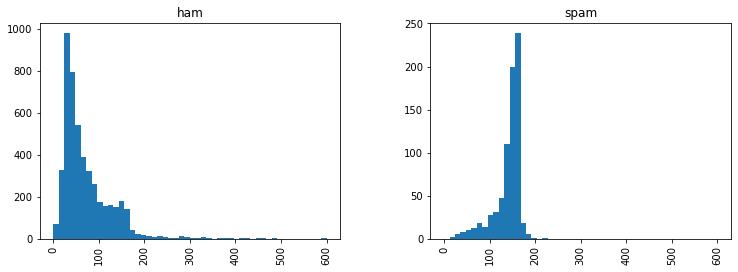

In [36]:
spam = pd.read_csv('spam.csv', encoding='latin-1')

spam.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

spam.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

spam['length'] = spam['message'].apply(len)

spam.hist(column='length', by='label', bins=50, figsize=(12, 4), range=(0, 600))

spam['label'] = spam['label'].map({ 'spam': 1, 'ham': 0 })

spam.head()



In [37]:
# Replace email address with 'emailaddress'
spam['message'] = spam['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')
# Replace urls with 'webaddress'
spam['message'] = spam['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')
# Replace money symbol with 'money-symbol'
spam['message'] = spam['message'].str.replace(r'£|\$', 'money-symbol')
# Replace 10 digit phone number with 'phone-number'
spam['message'] = spam['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phone-number')
# Replace normal number with 'number'
spam['message'] = spam['message'].str.replace(r'\d+(\.\d+)?', 'number')
# remove punctuation
spam['message'] = spam['message'].str.replace(r'[^\w\d\s]', ' ')
# remove whitespace between terms with single space
spam['message'] = spam['message'].str.replace(r'\s+', ' ')
# remove leading and trailing whitespace
spam['message'] = spam['message'].str.replace(r'^\s+|\s*?$', ' ')
# change words to lower case
spam['message'] = spam['message'].str.lower()

In [46]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
spam['message'] = spam['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bened\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bened\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
x = spam['message']
y = spam["label"]
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.3)

cv = CountVectorizer()
features = cv.fit_transform(x_train)

model = svm.SVC()
model.fit(features,y_train)

features_test = cv.transform(x_test)
print(model.score(features_test,y_test))

0.9772727272727273
